In [6]:
!pip install matplotlib pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 12.6 MB/s eta 0:00:0000:01:010m
  Using cached pytz-2022.7-py2.py3-none-any.whl (499 kB)
You should consider upgrading via the '/Users/calistamayer/.pyenv/versions/3.10.5/bin/python3.10 -m pip install --upgrade pip' command.


['Saturday 2022-12-17', 'Sunday 2022-12-18', 'Tuesday 2022-12-20', 'Tuesday 2022-12-20', 'Wednesday 2022-12-21', 'Wednesday 2022-12-21', 'Thursday 2022-12-22', 'Friday 2022-12-23', 'Saturday 2022-12-24', 'Sunday 2022-12-25', 'Monday 2022-12-26', 'Tuesday 2022-12-27', 'Wednesday 2022-12-28', 'Thursday 2022-12-29', 'Friday 2022-12-30', 'Saturday 2022-12-31', 'Sunday 2023-01-01', 'Monday 2023-01-02', 'Tuesday 2023-01-03', 'Tuesday 2023-01-03', 'Wednesday 2023-01-04', 'Thursday 2023-01-05', 'Friday 2023-01-06', 'Friday 2023-01-06', 'Saturday 2023-01-07', 'Sunday 2023-01-08', 'Tuesday 2023-01-10', 'Tuesday 2023-01-10', 'Wednesday 2023-01-11', 'Thursday 2023-01-12']
[8.08472282032, 8.977881783199999, 2.9999801535999997, 6.20762256224, 8.071301202399999, 0.0, 7.989777300959999, 7.698975579359999, 8.00002992576, 9.08264496752, 4.051775183839999, 0.18641136, 6.037677539040001, 7.025160650079999, 7.27793445424, 6.00002244432, 9.906396767359999, 4.04431872944, 7.05013977232, 0.0, 5.97429767664, 9

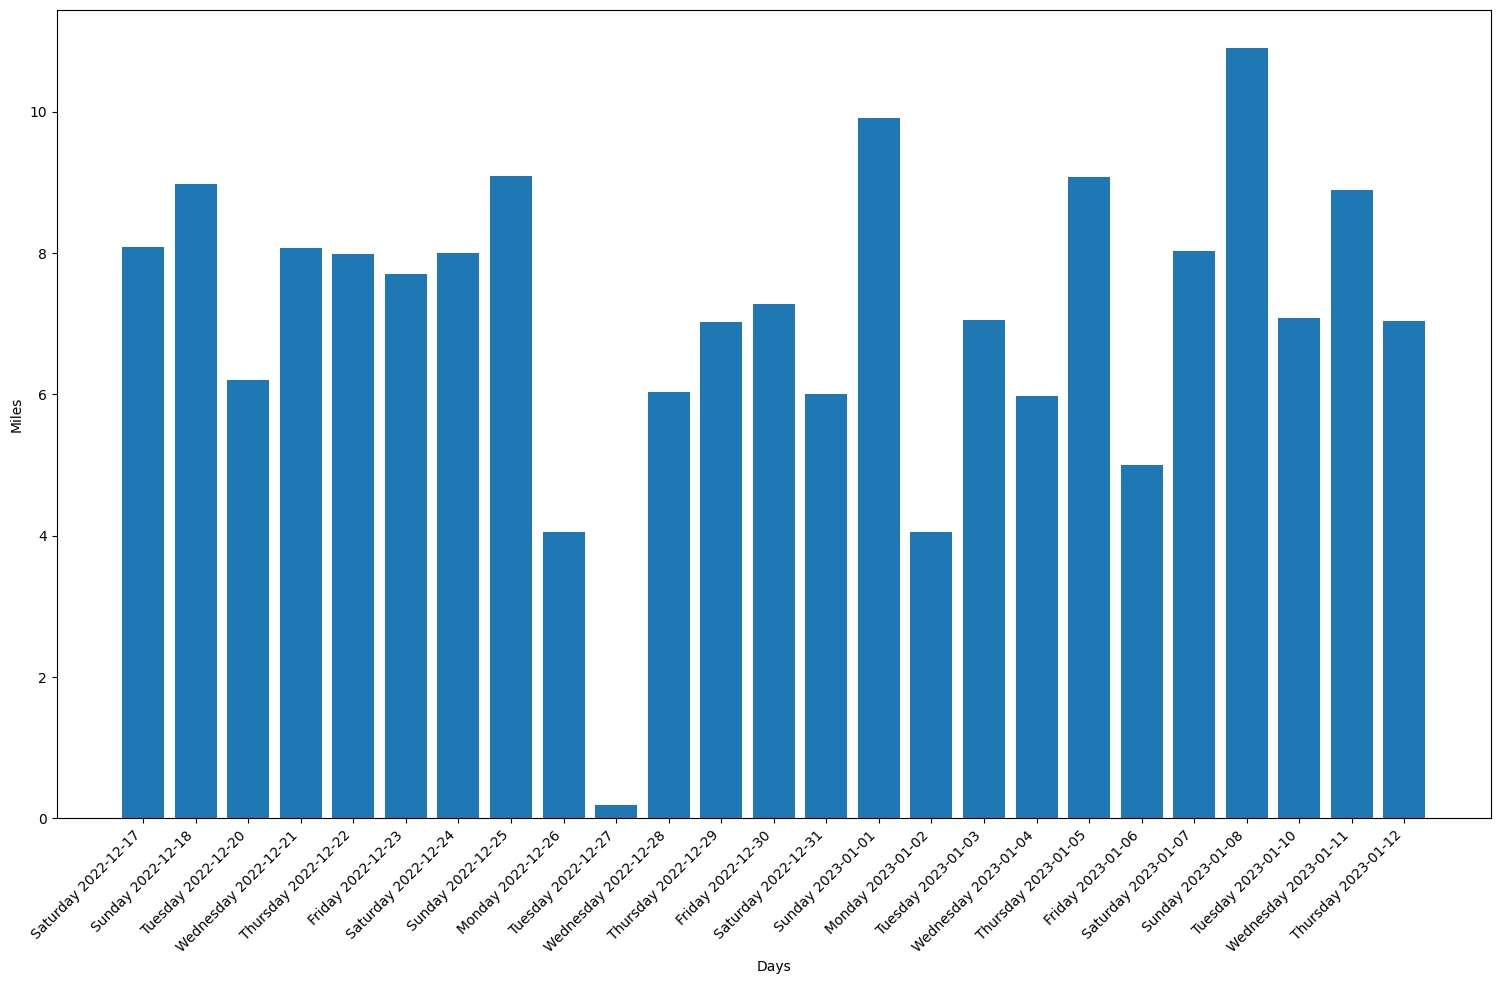

In [11]:
import json
import matplotlib.pyplot as plt
import pandas as pd


with open("response_1673562474836.json") as file:
  data = json.load(file)
runs = []
day_of_week = []
for run in data: 
 # run.get("distance")
  # runs.insert(0, run.get("distance"))
  date_str = run.get("start_date")[0:10]
  day = pd.Timestamp(date_str).day_name()
  day_of_week.insert(0, f'{day} {date_str}')
  in_meters = run.get("distance")
  in_miles = in_meters * 0.0006213712
  runs.insert(0, in_miles)
print(day_of_week)
print(runs)

# print("what is this??", list(range(len(runs))))
# x = list(range(len(runs)))
plt.bar(day_of_week, runs)
plt.gcf().set_size_inches(18.5, 10.5)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Miles")
plt.xlabel("Days")
plt.show()
